## Advanced Linear regression (Losso and Ridge)

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

#ignore the warnings 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset
housing = pd.read_csv('train.csv')

In [4]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#printing the summary of the dataset
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### understanding the data dictionary

In [6]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
housing.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
housing.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
#fill the null data with zero for observations
housing.fillna(0)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave     0      Reg   
1        2          20       RL         80.0     9600   Pave     0      Reg   
2        3          60       RL         68.0    11250   Pave     0      IR1   
3        4          70       RL         60.0     9550   Pave     0      IR1   
4        5          60       RL         84.0    14260   Pave     0      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave     0      Reg   
1456  1457          20       RL         85.0    13175   Pave     0      Reg   
1457  1458          70       RL         66.0     9042   Pave     0      Reg   
1458  1459          20       RL         68.0     9717   Pave     0      Reg   
1459  1460          20       RL         75.0     9937   Pave     0      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0      0      0           0       0   
1            Lvl    AllPub  ...        0      0      0           0       0   
2            Lvl    AllPub  ...        0      0      0           0       0   
3            Lvl    AllPub  ...        0      0      0           0       0   
4            Lvl    AllPub  ...        0      0      0           0       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0      0      0           0       0   
1456         Lvl    AllPub  ...        0      0  MnPrv           0       0   
1457         Lvl    AllPub  ...        0      0  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0      0      0           0       0   
1459         Lvl    AllPub  ...        0      0      0           0       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### Initial observation on Data
1. The housing data consist some of the null values.
2. There are lot of categorical variables in the data.
3. Checked for the missing values have some in LotFrontage, PoolQC,fence,Alley etc.
4. Sales Type and 

# EDA and Visualising the data

In [ ]:
#visualising the numeric variables data
sns.pairplot(housing, vars=['LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd',
                            'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 
                            'TotalBsmtSF', '1stFlrSF','2ndFlrSF','LowQualFinSF', 
                            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                            'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
                            'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea',
                            'WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch', 
                            'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice'])
plt.show()
                           


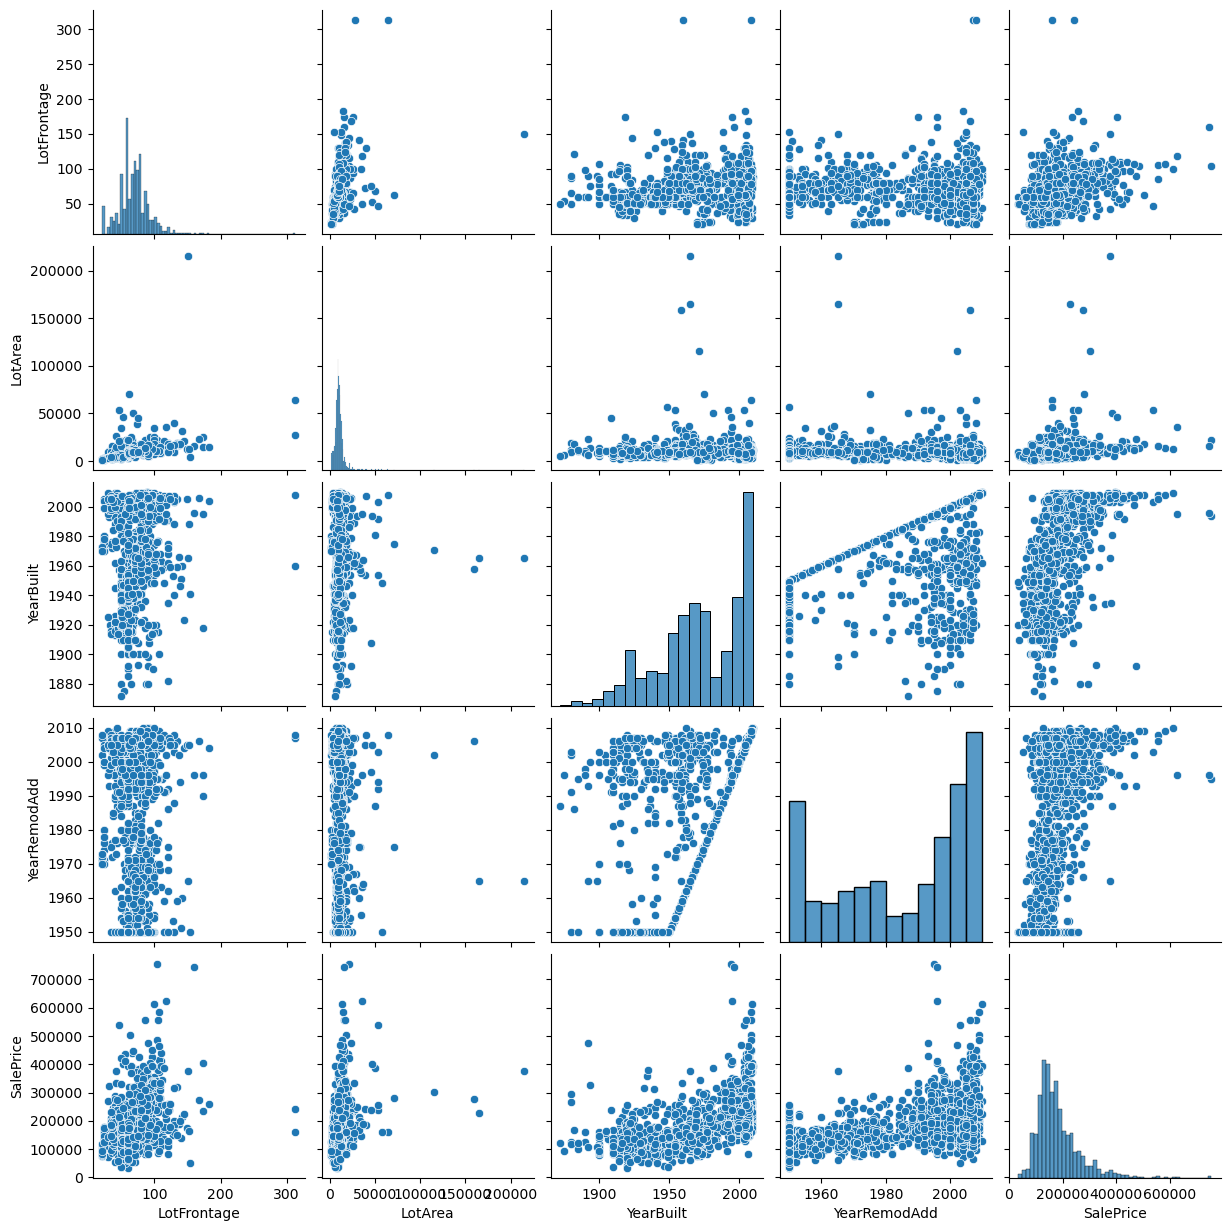

In [15]:
sns.pairplot(housing, vars=['LotFrontage', 'LotArea','YearBuilt', 'YearRemodAdd', 'SalePrice'])
plt.show()

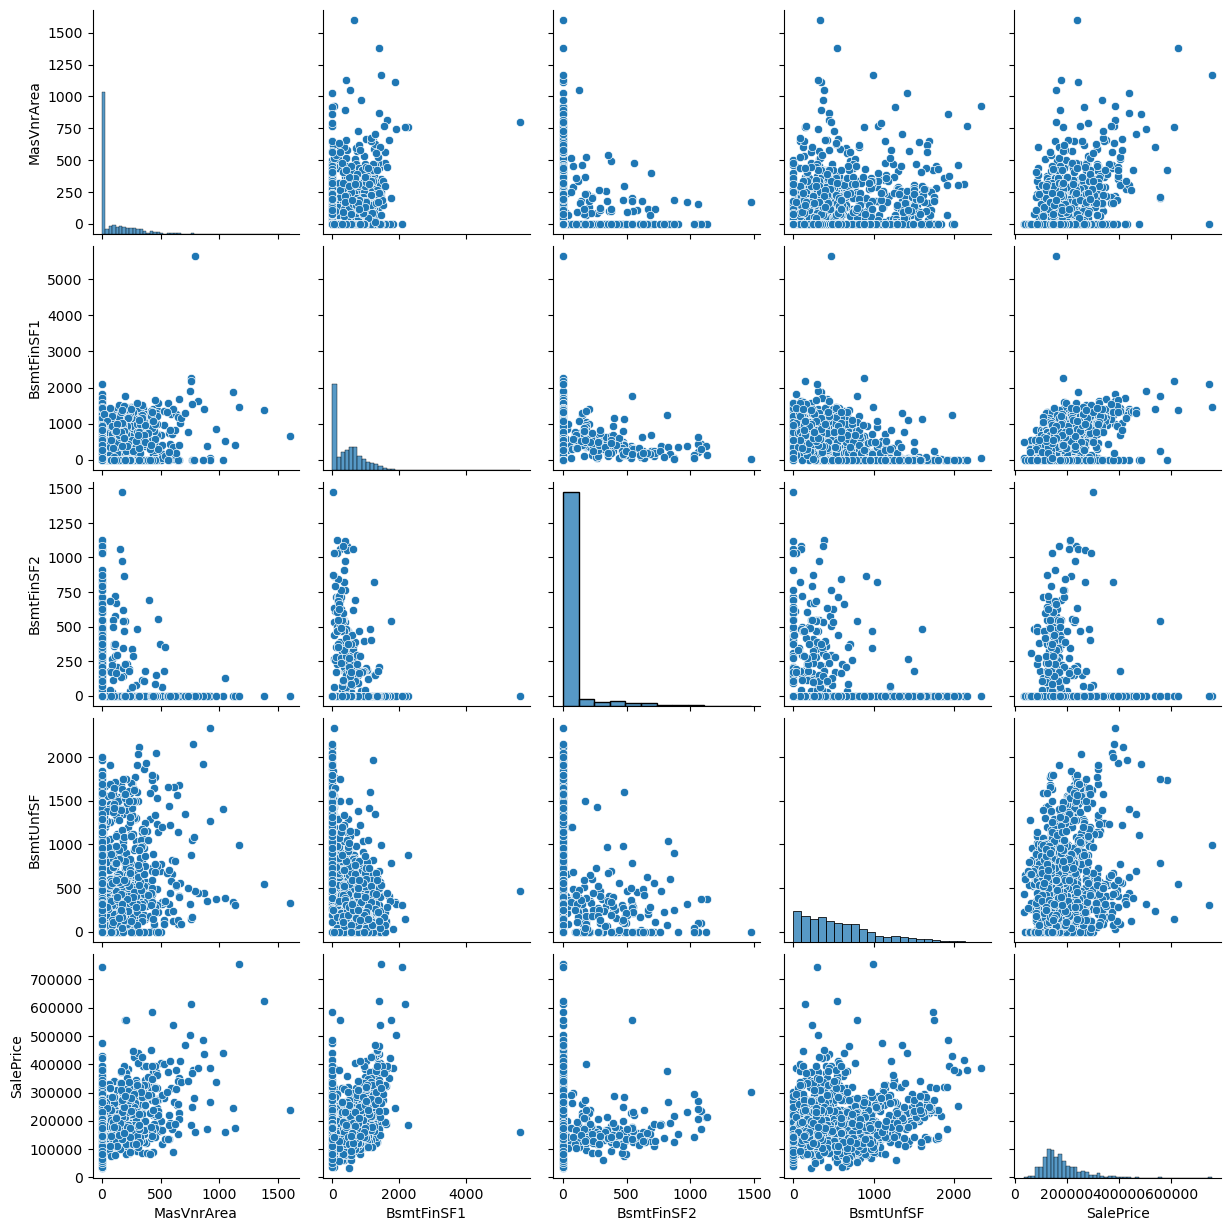

In [16]:
sns.pairplot(housing, vars=['MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'SalePrice'])
plt.show()

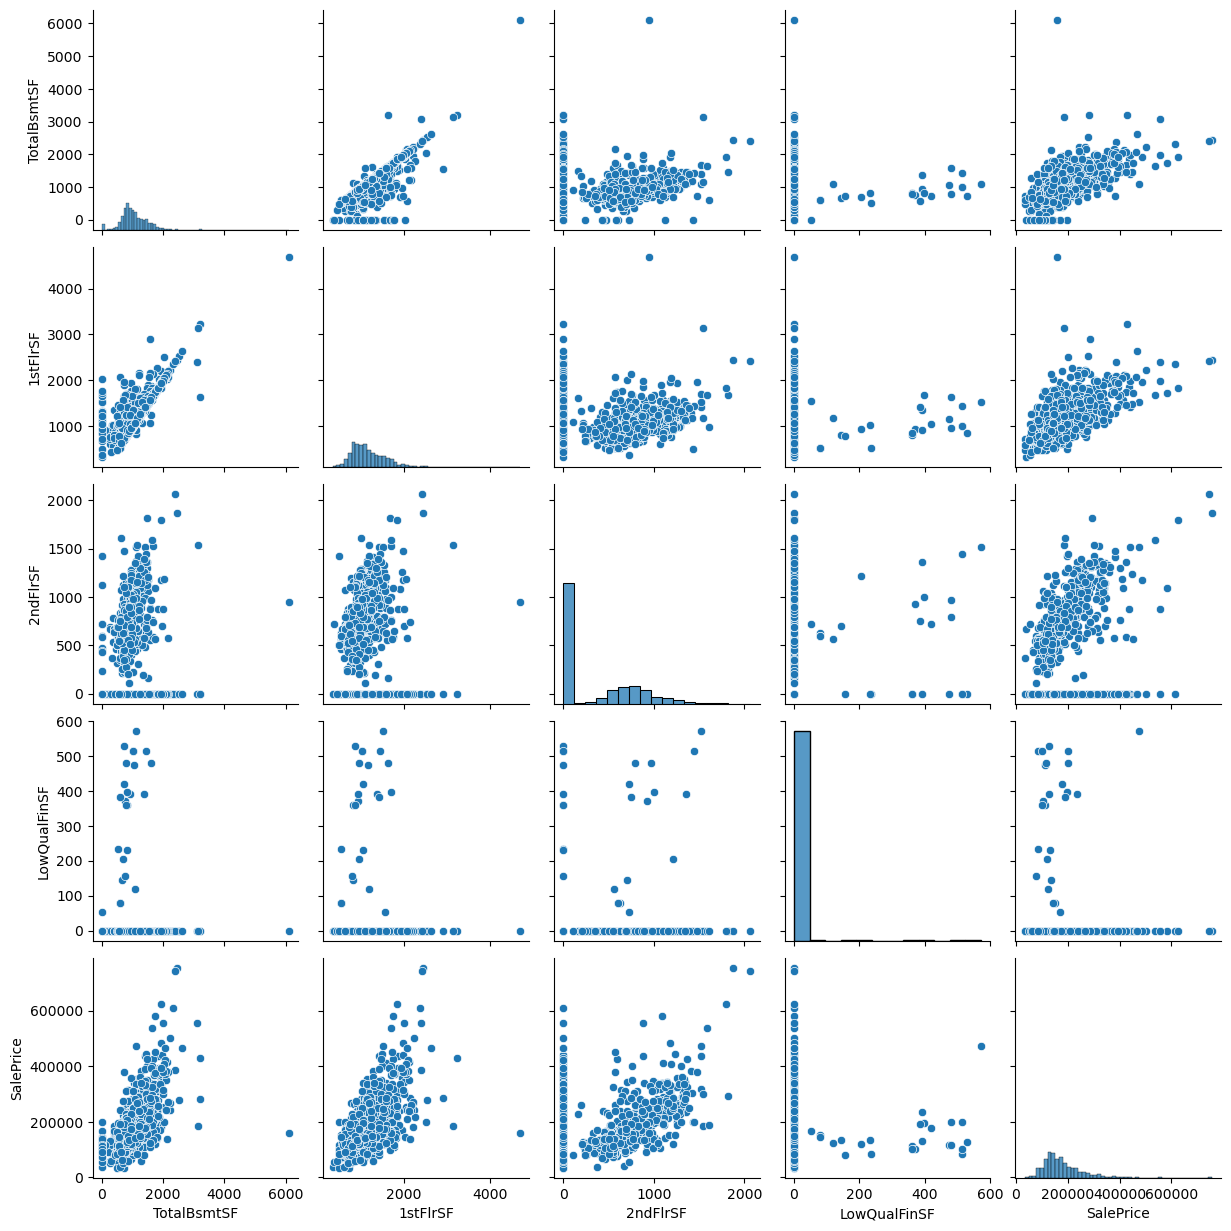

In [17]:
sns.pairplot(housing, vars=['TotalBsmtSF', '1stFlrSF','2ndFlrSF','LowQualFinSF', 'SalePrice'])
plt.show()

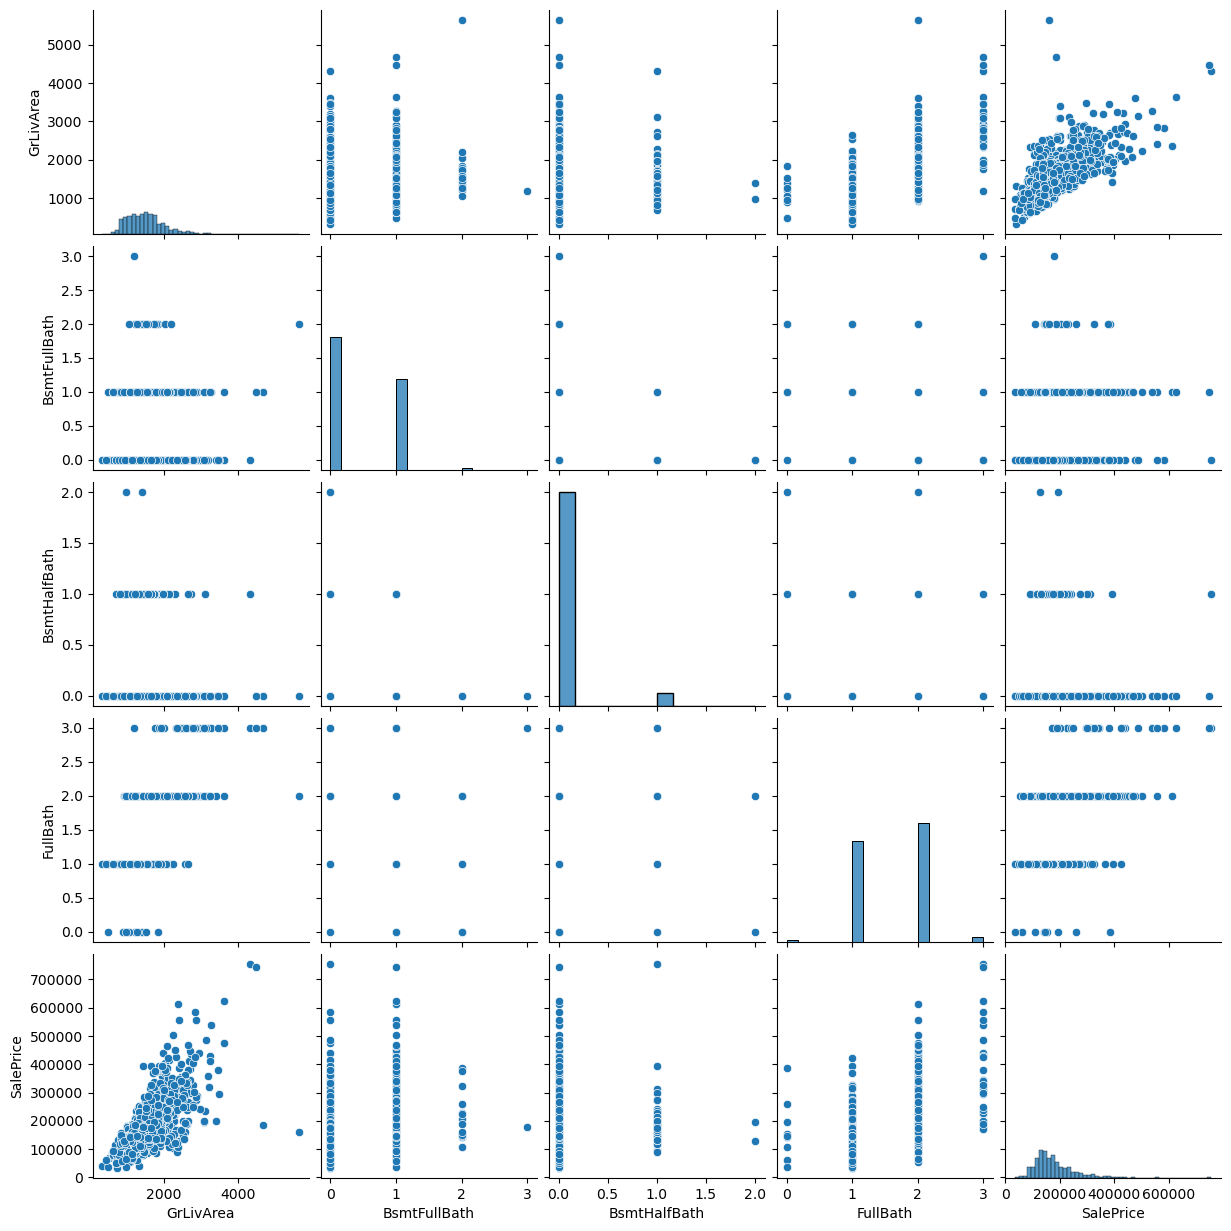

In [18]:
sns.pairplot(housing, vars=['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'SalePrice'])
plt.show()

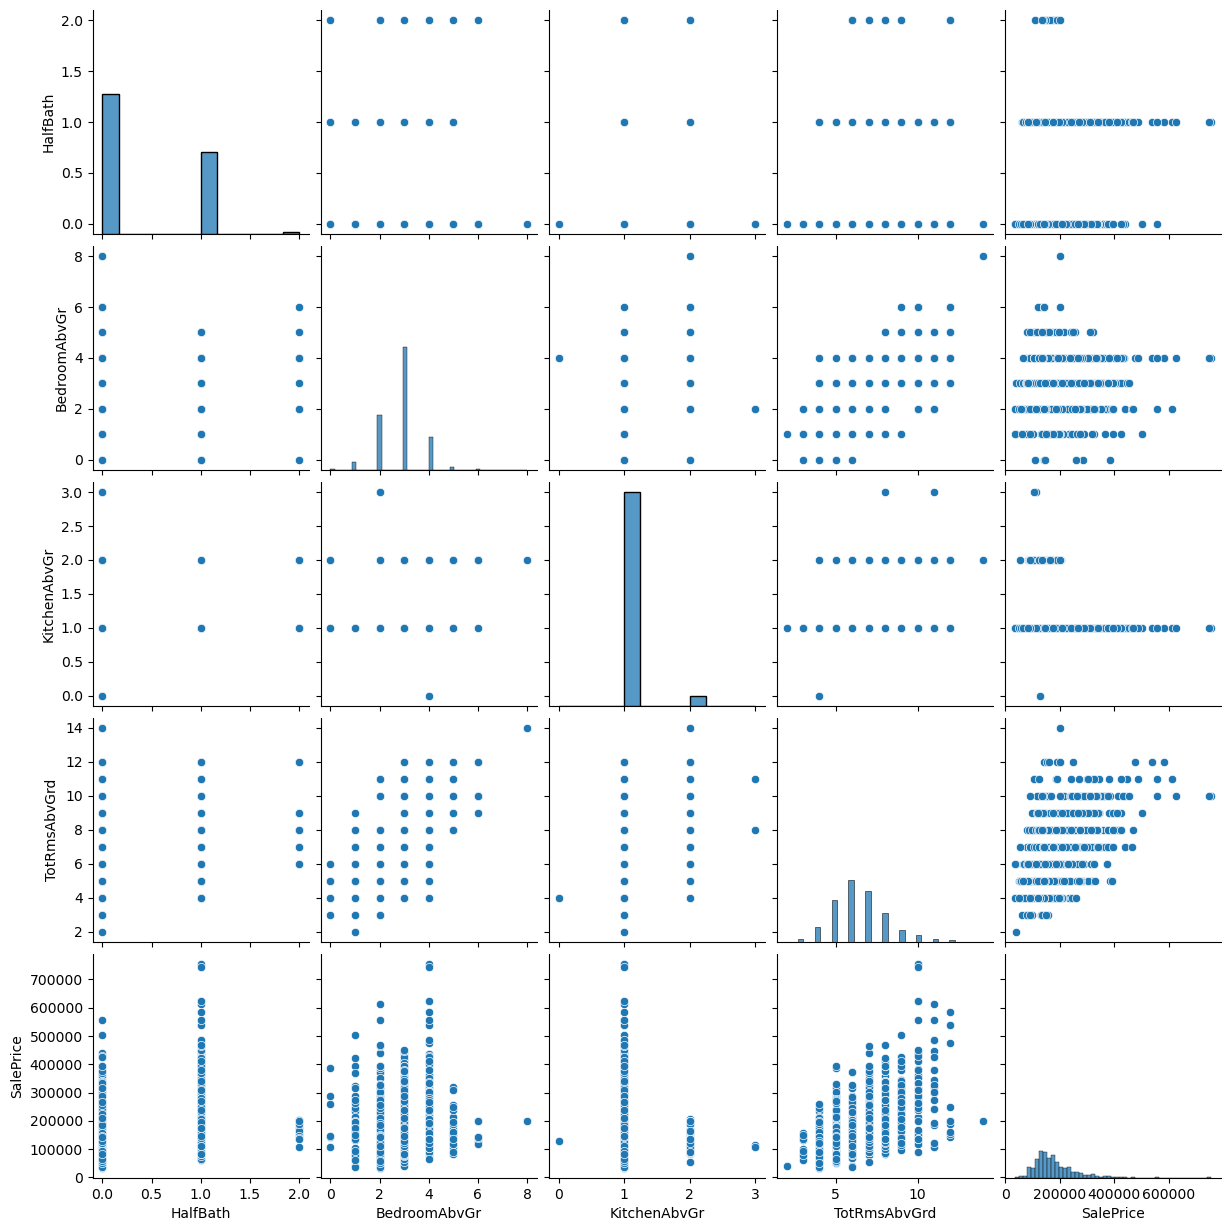

In [19]:
sns.pairplot(housing, vars=['HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'SalePrice'])
plt.show()

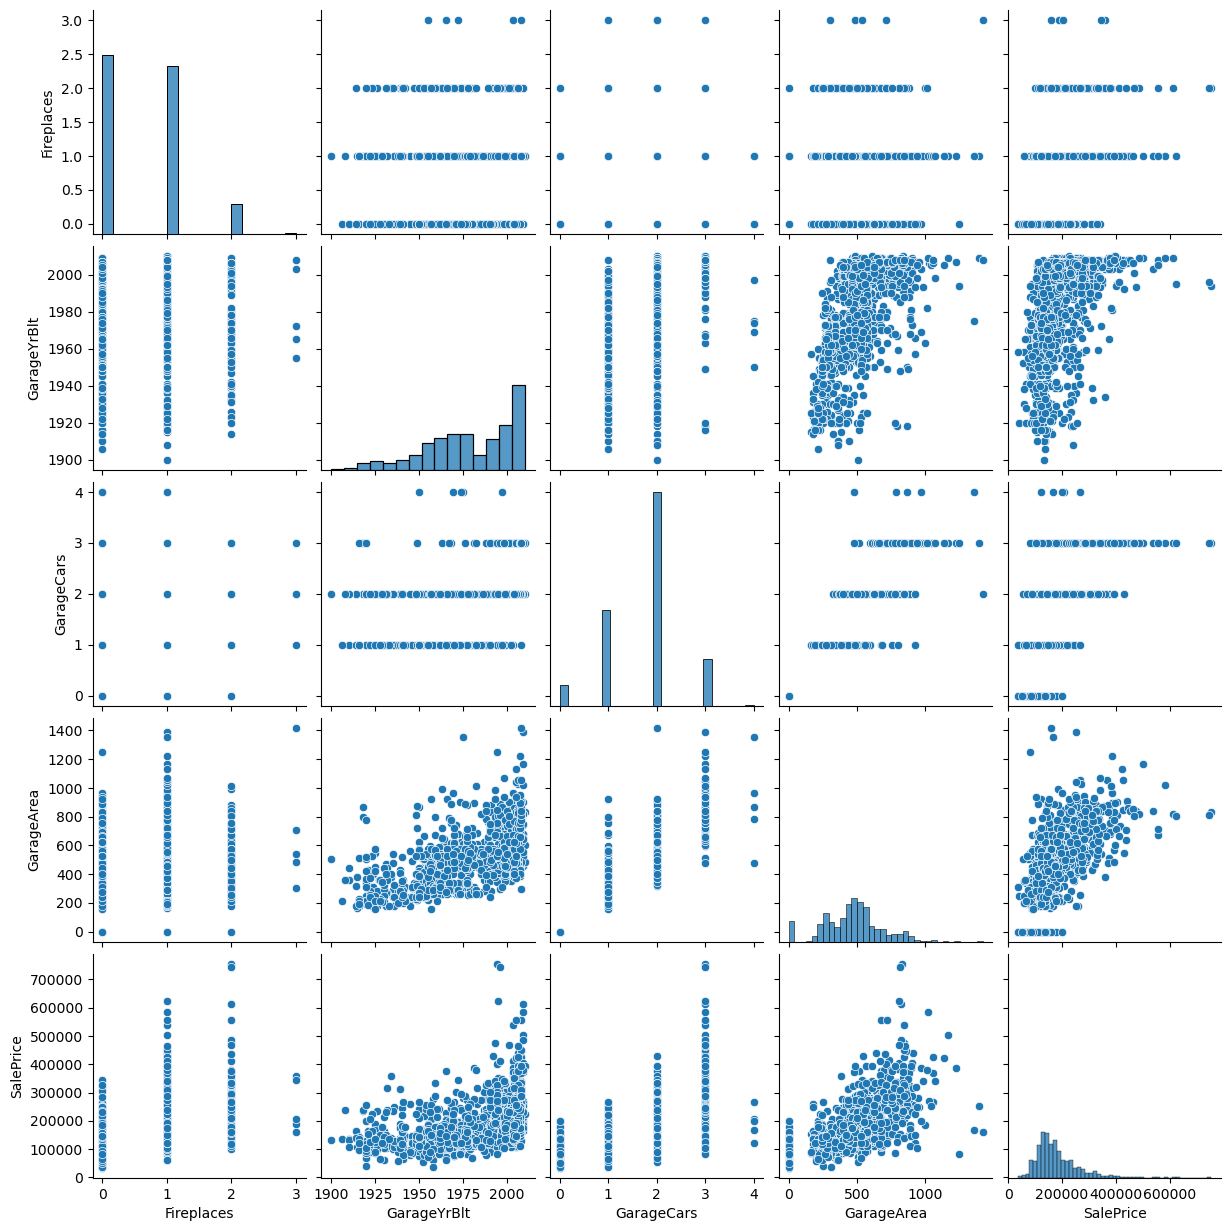

In [20]:
sns.pairplot(housing, vars=['Fireplaces','GarageYrBlt','GarageCars', 'GarageArea', 'SalePrice'])
plt.show()

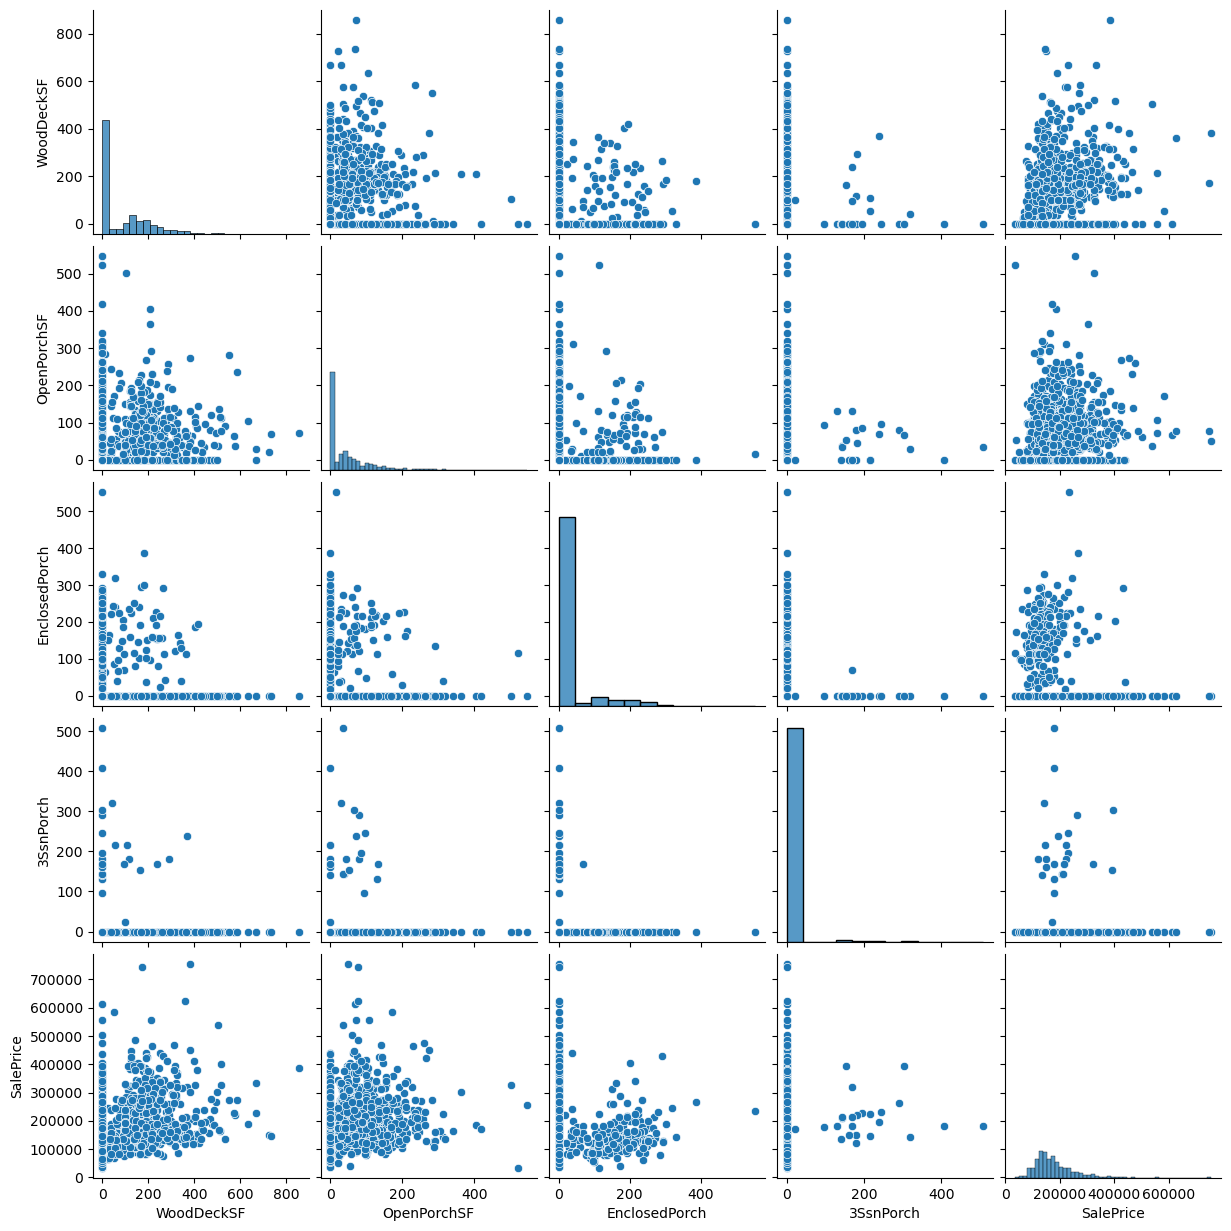

In [21]:
sns.pairplot(housing, vars=['WoodDeckSF','OpenPorchSF','EnclosedPorch', '3SsnPorch', 'SalePrice'])
plt.show()

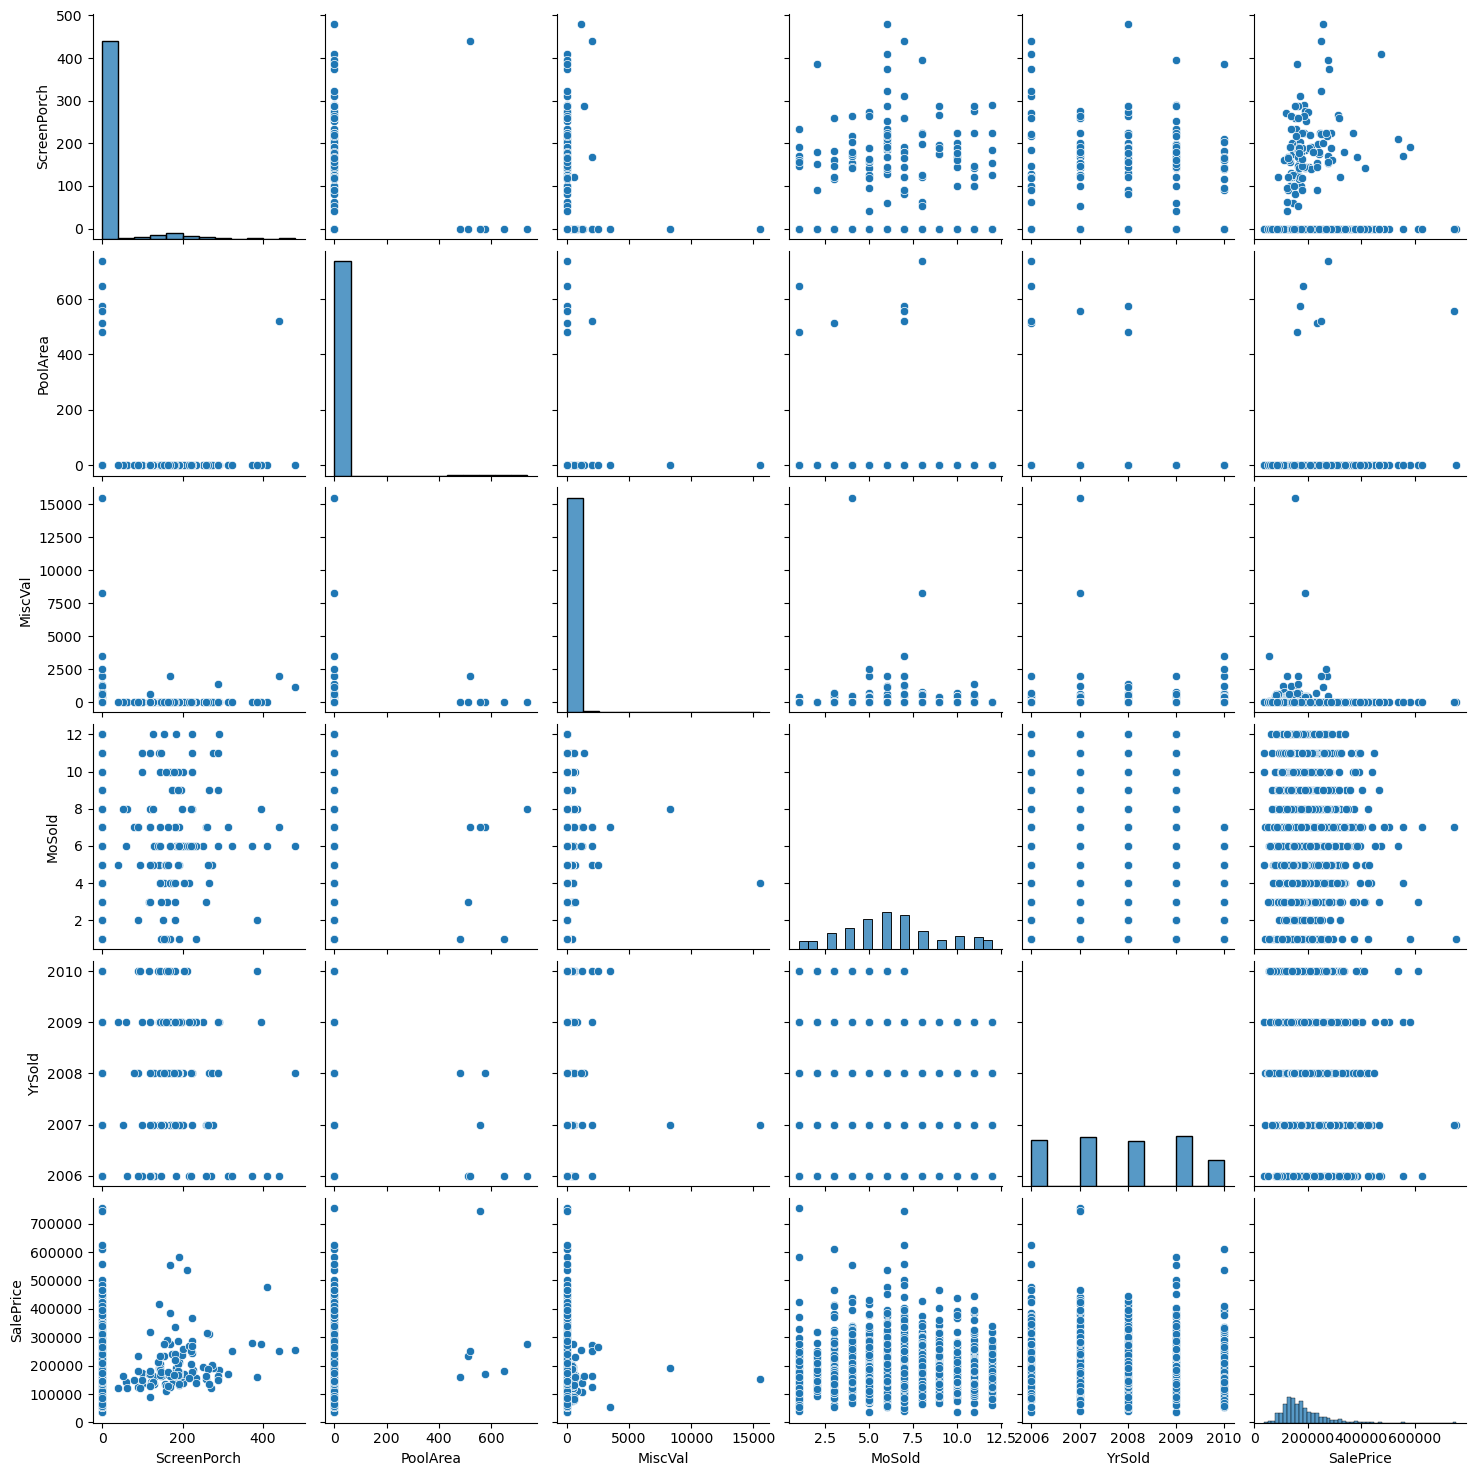

In [22]:
sns.pairplot(housing, vars=['ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])
plt.show()

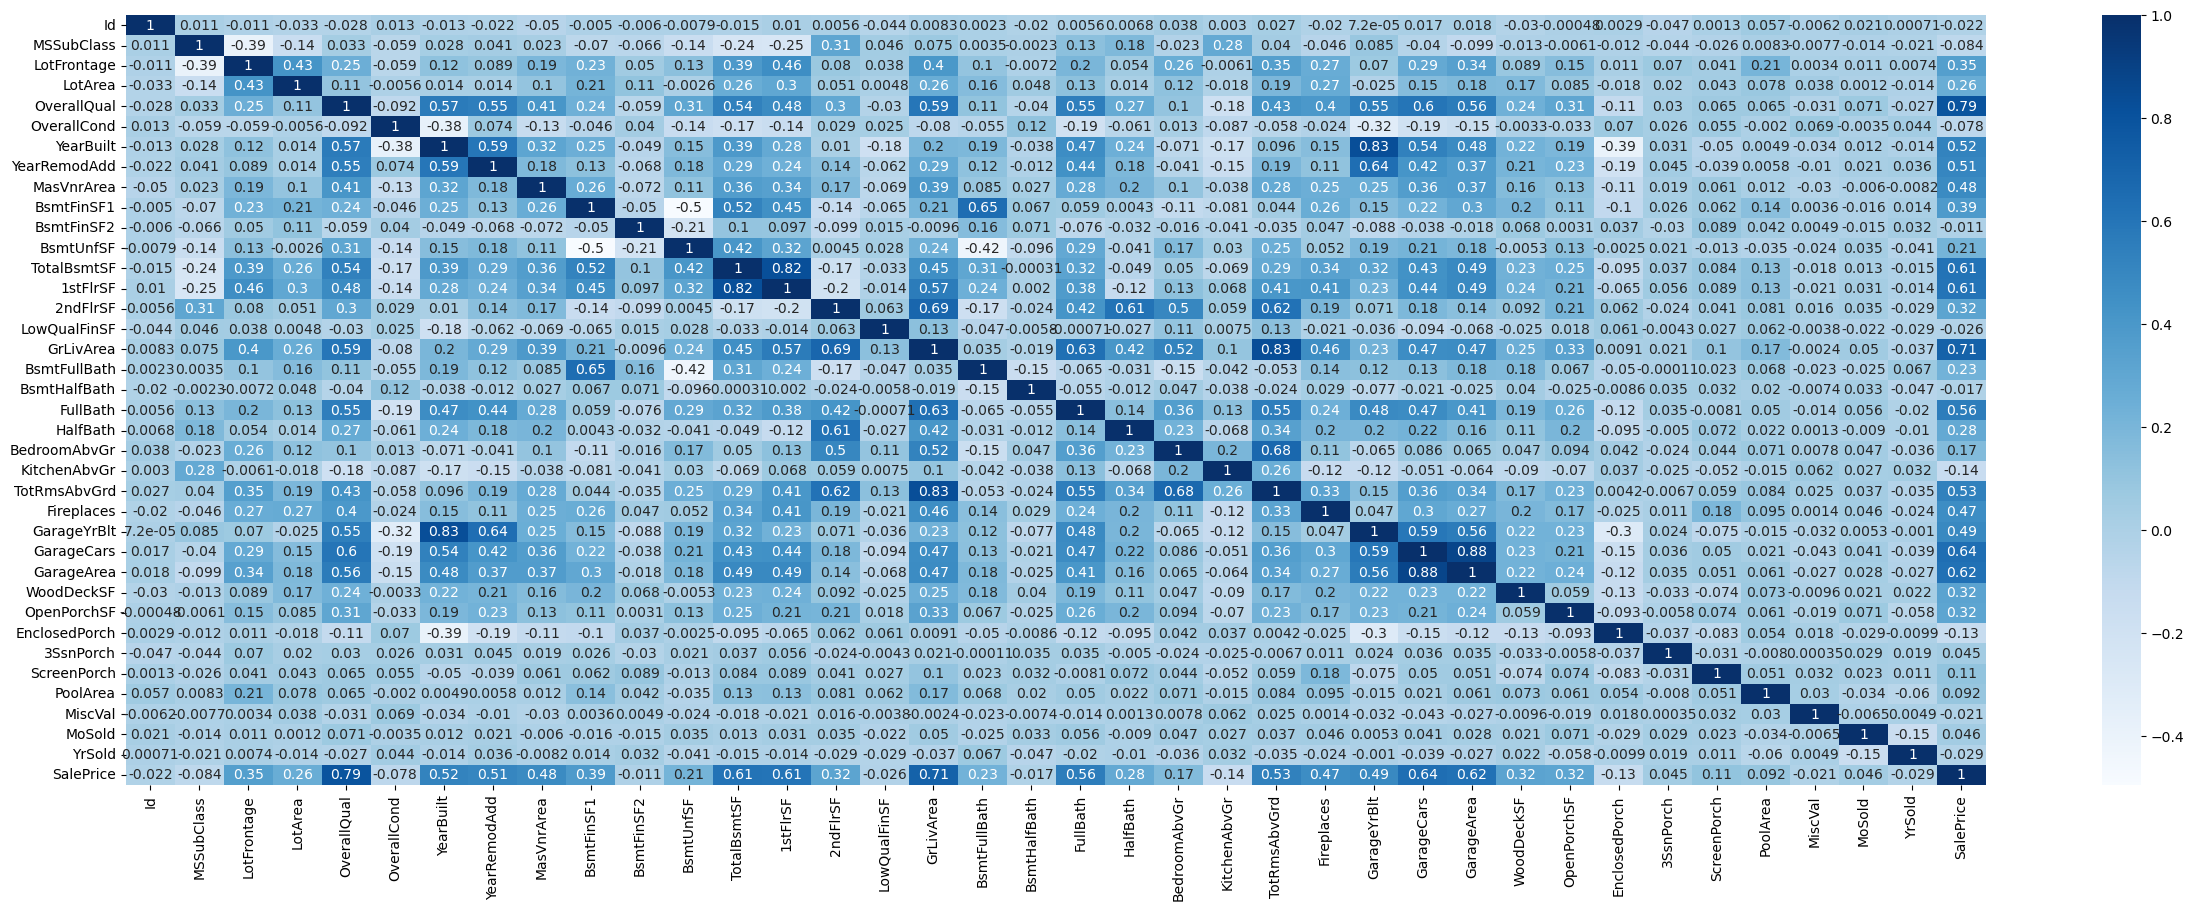

In [25]:
# Correlation between varibles
plt.figure(figsize = (30, 10))
sns.heatmap(housing.corr(), annot = True, cmap="Blues")
plt.show()

In [27]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
## Observations on numeric data correlation
1.GrLivArea Living area squre feet has highest correlation with the Sales price.
2.TotalBSmtSF and 1stFlrSF has second highest correlation.

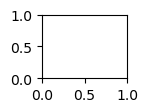

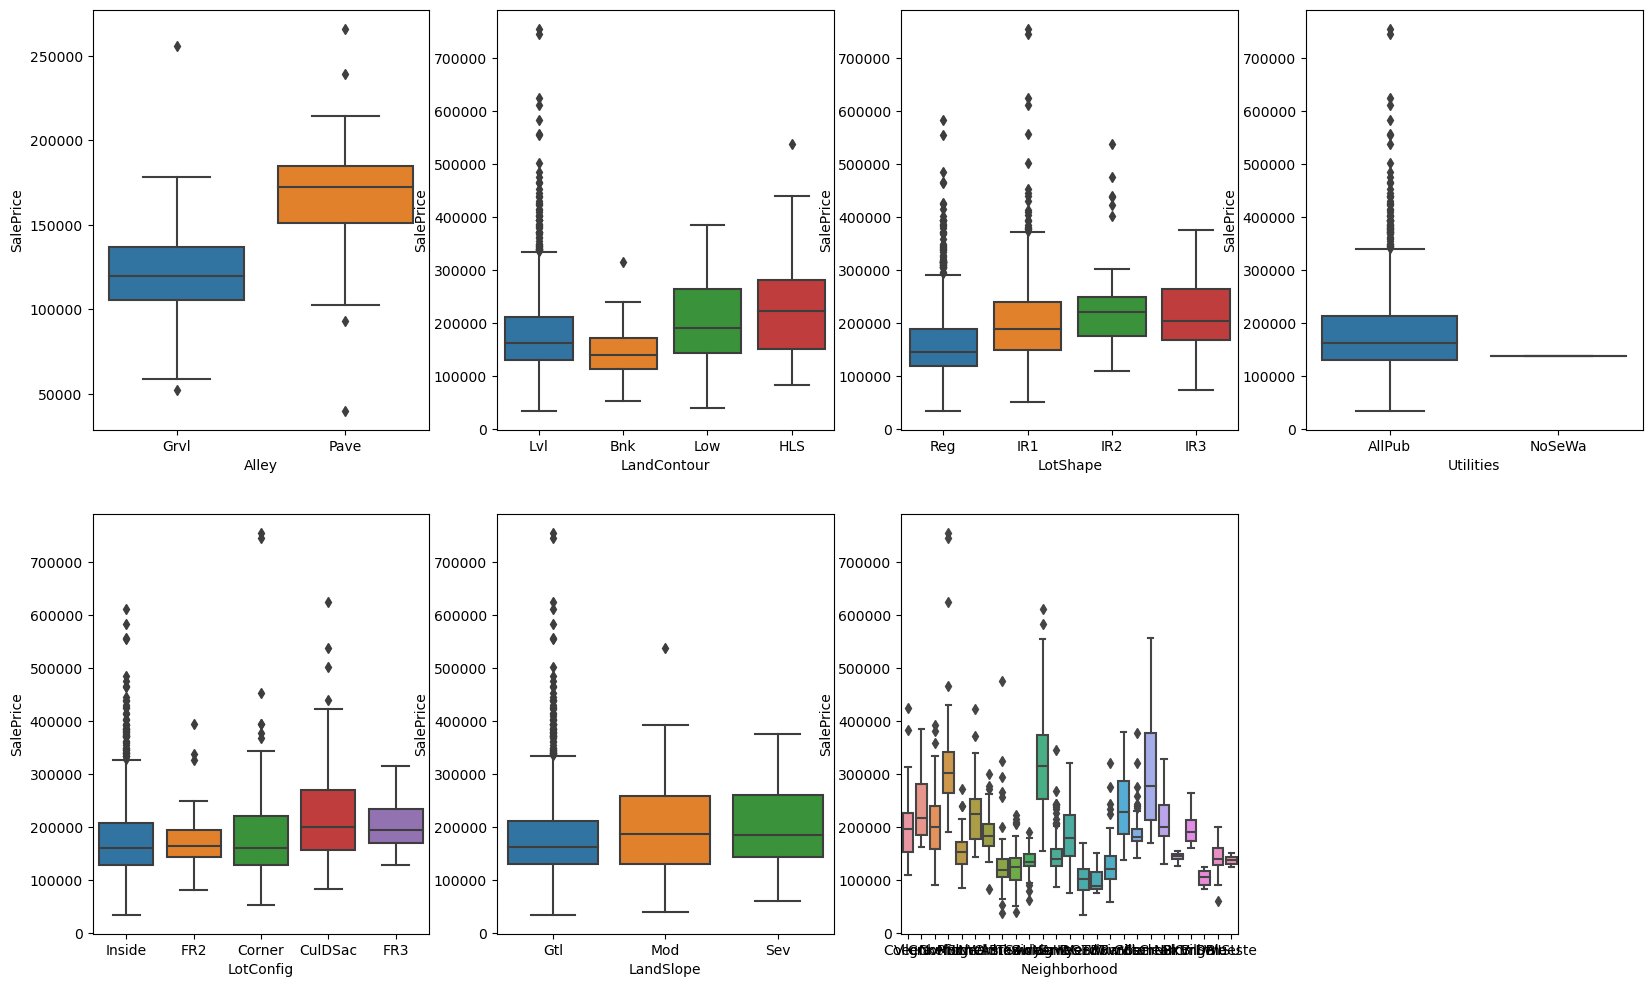

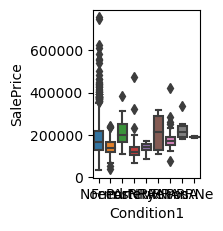

In [41]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Alley', y = 'SalePrice', data = housing)
plt.subplot(2,4,2)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing)
plt.subplot(2,4,3)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing)
plt.subplot(2,4,4)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing)
plt.subplot(2,4,5)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing)
plt.subplot(2,4,6)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing)
plt.subplot(2,4,7)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,8)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing)
plt.show()






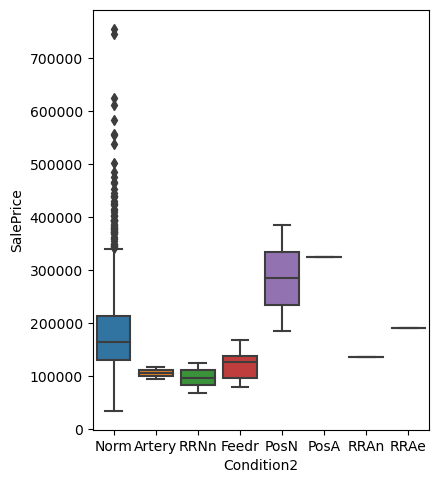

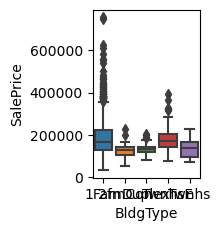

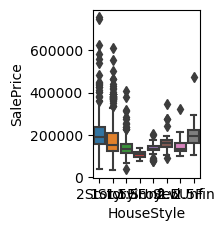

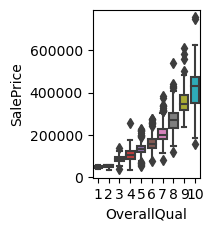

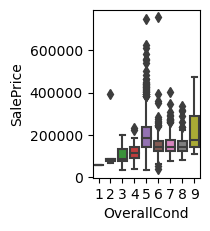

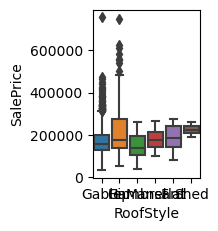

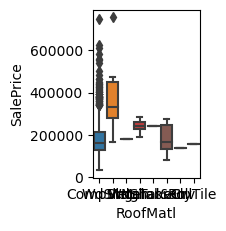

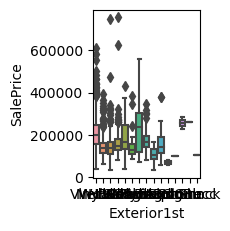

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,2)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,3)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,4)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,5)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,6)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,7)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,8)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing)
plt.show()

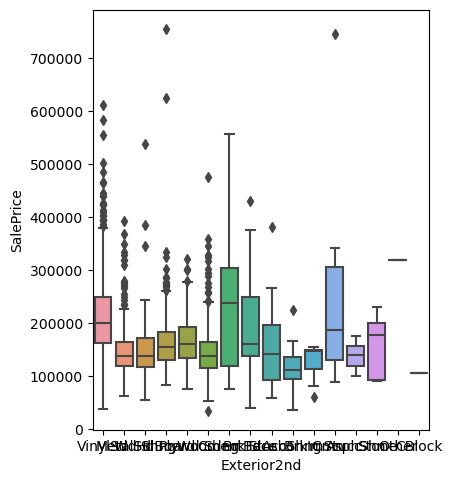

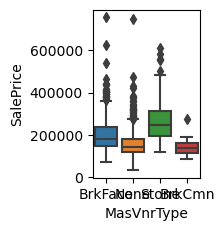

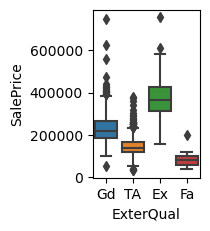

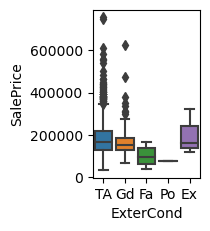

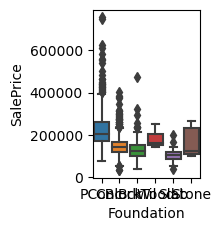

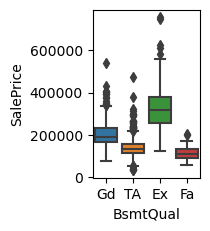

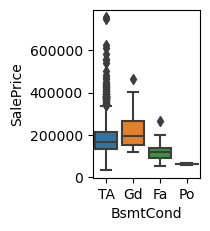

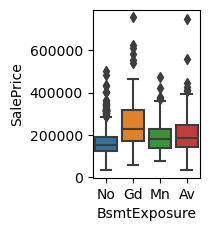

In [43]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,2)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,3)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,4)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,5)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,6)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,7)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,8)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing)
plt.show()


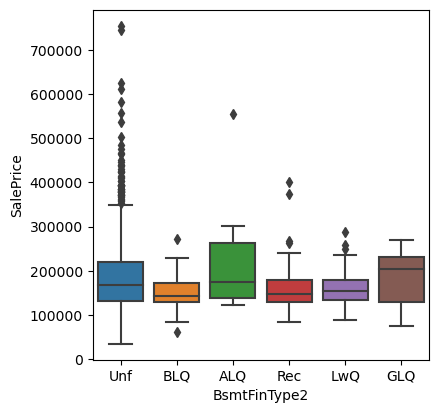

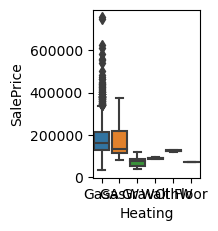

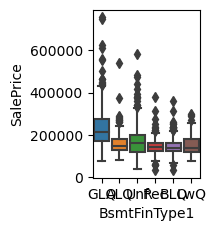

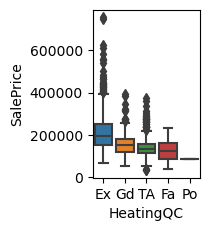

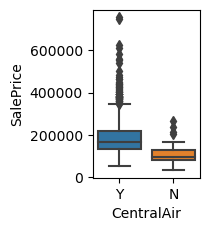

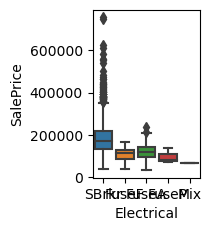

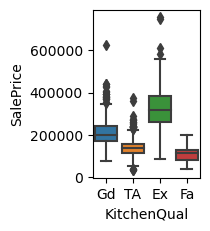

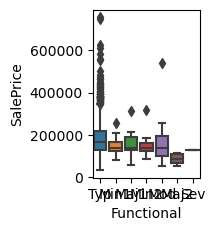

In [44]:
plt.figure(figsize=(20, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,2)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,3)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,4)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,5)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,6)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,7)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,8)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = housing)
plt.show()







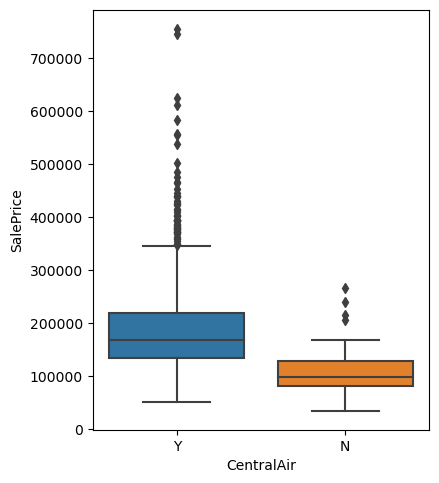

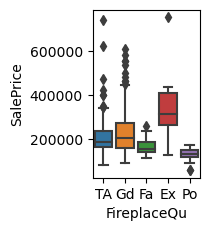

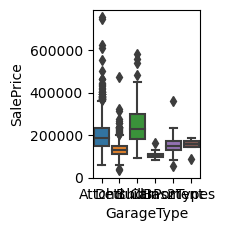

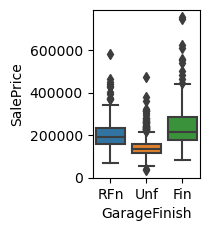

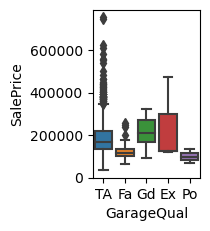

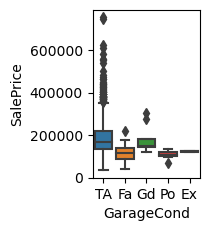

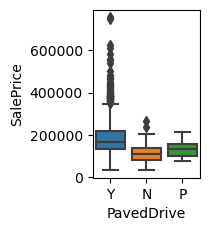

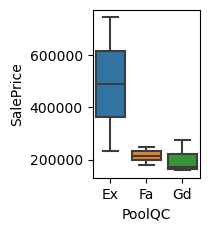

In [45]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,2)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,3)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,4)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,5)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,6)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,7)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,8)
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = housing)
plt.show()


<Figure size 2000x1200 with 0 Axes>

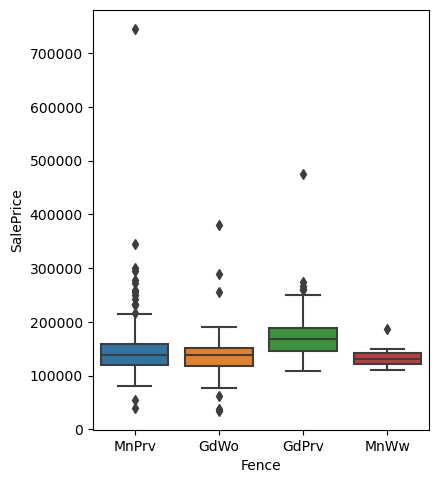

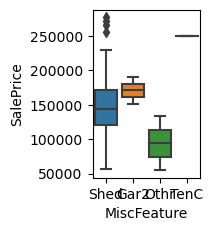

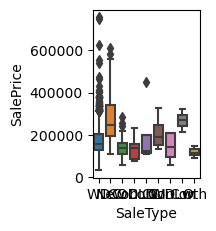

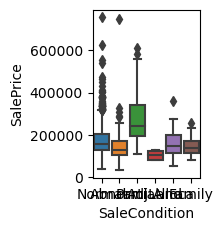

In [47]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'Fence', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,2)
sns.boxplot(x = 'MiscFeature', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,3)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing)
plt.show()
plt.subplot(2,4,4)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing)
plt.show()

# Observations

# creating the Dummy variables

In [48]:
housing['Alley'].astype('category')
housing['LandContour'].astype('category')
housing['LotShape'].astype('category')
housing['Utilities'].astype('category')
housing['LotConfig'].astype('category')
housing['LandSlope'].astype('category')
housing['Neighborhood'].astype('category')
housing['Condition1'].astype('category')
housing['Condition2'].astype('category')
housing['BldgType'].astype('category')
housing['HouseStyle'].astype('category')
housing['OverallQual'].astype('category')
housing['OverallCond'].astype('category')
housing['RoofStyle'].astype('category')
housing['RoofMatl'].astype('category')
housing['Exterior1st'].astype('category')
housing['Exterior2nd'].astype('category')
housing['MasVnrType'].astype('category')
housing['ExterQual'].astype('category')
housing['ExterCond'].astype('category')
housing['Foundation'].astype('category')
housing['BsmtQual'].astype('category')
housing['BsmtCond'].astype('category')
housing['BsmtExposure'].astype('category')
housing['BsmtFinType1'].astype('category')
housing['BsmtFinType2'].astype('category')
housing['Heating'].astype('category')
housing['HeatingQC'].astype('category')
housing['CentralAir'].astype('category')
housing['Electrical'].astype('category')
housing['KitchenQual'].astype('category')
housing['Functional'].astype('category')
housing['CentralAir'].astype('category')
housing['FireplaceQu'].astype('category')
housing['GarageType'].astype('category')
housing['GarageFinish'].astype('category')
housing['GarageQual'].astype('category')
housing['GarageCond'].astype('category')
housing['PavedDrive'].astype('category')
housing['PoolQC'].astype('category')
housing['Fence'].astype('category')
housing['MiscFeature'].astype('category')
housing['SaleType'].astype('category')
housing['SaleCondition'].astype('category')

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: category
Categories (6, object): ['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial']